# Recognition tables with text
variant 4

In [1]:
name_jpg = 'sample_6.jpg'

In [2]:
%matplotlib inline
import pytesseract
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
def show_image (img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()

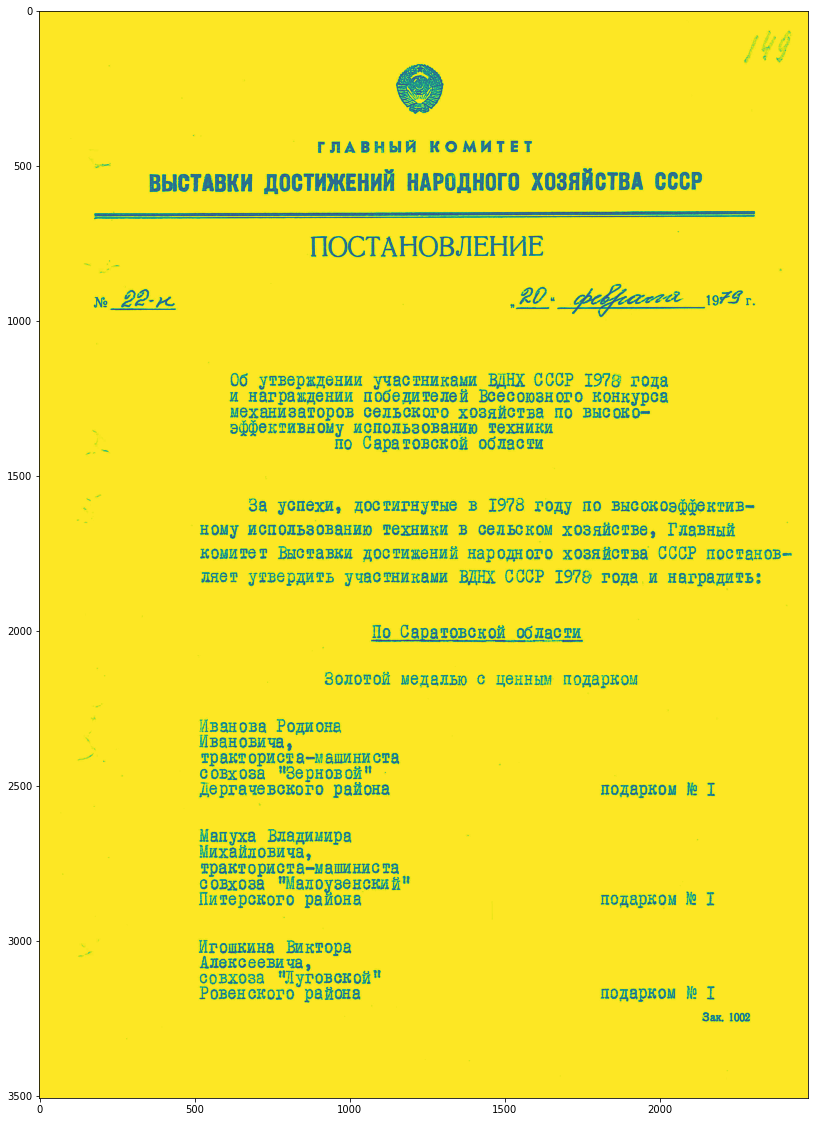

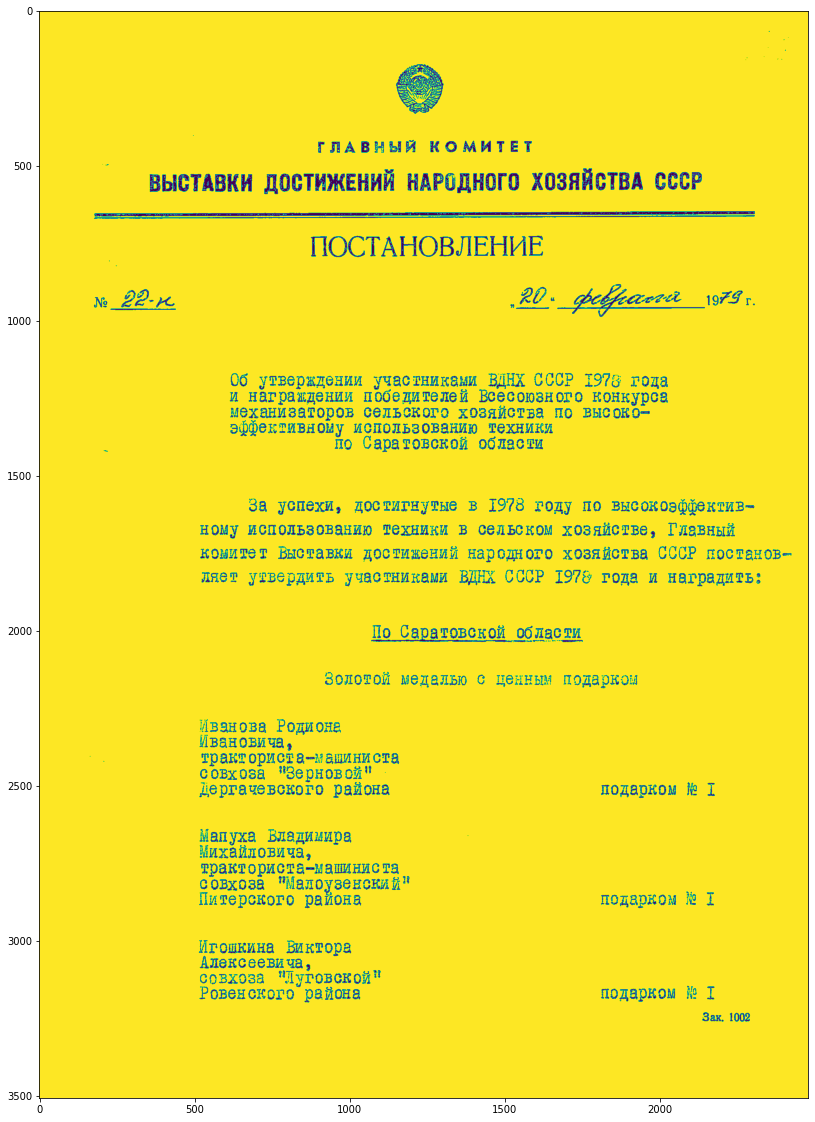

In [4]:
gray = cv2.imread(name_jpg, 0)
show_image(gray)
ret, threshold_gray = cv2.threshold(gray, 120, 255, 0)
show_image(threshold_gray)

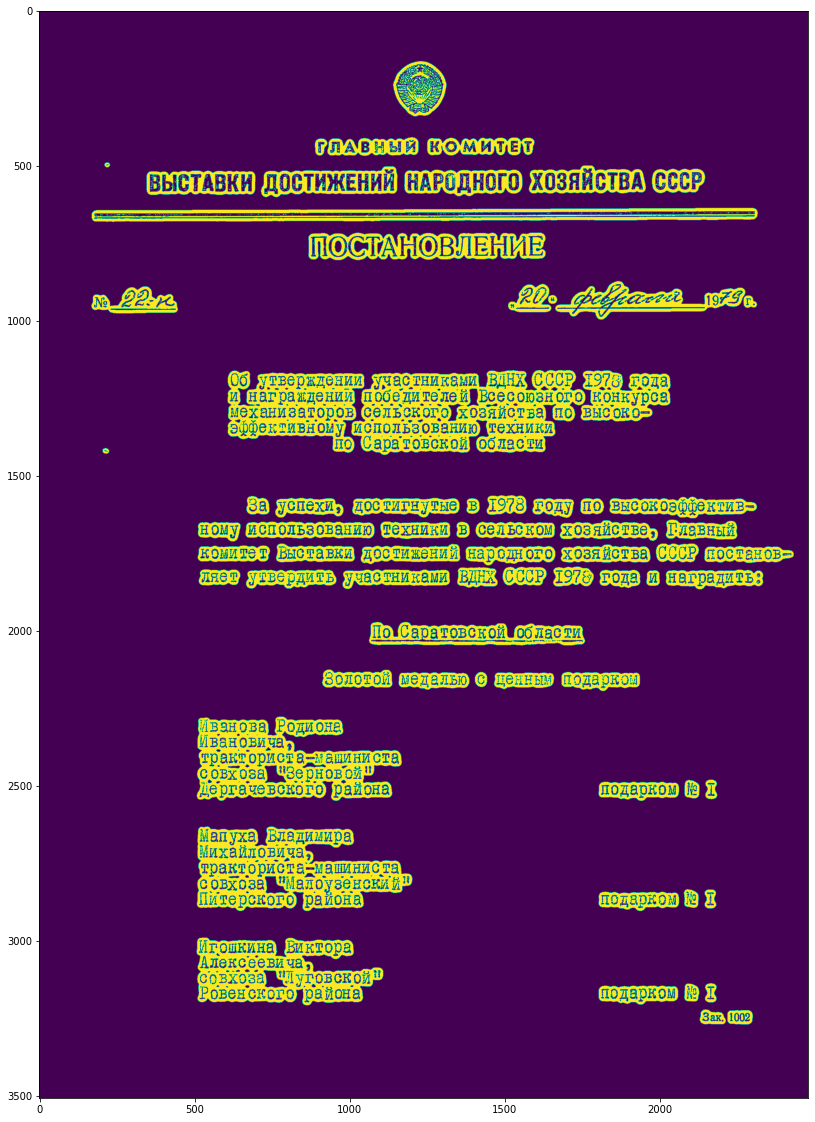

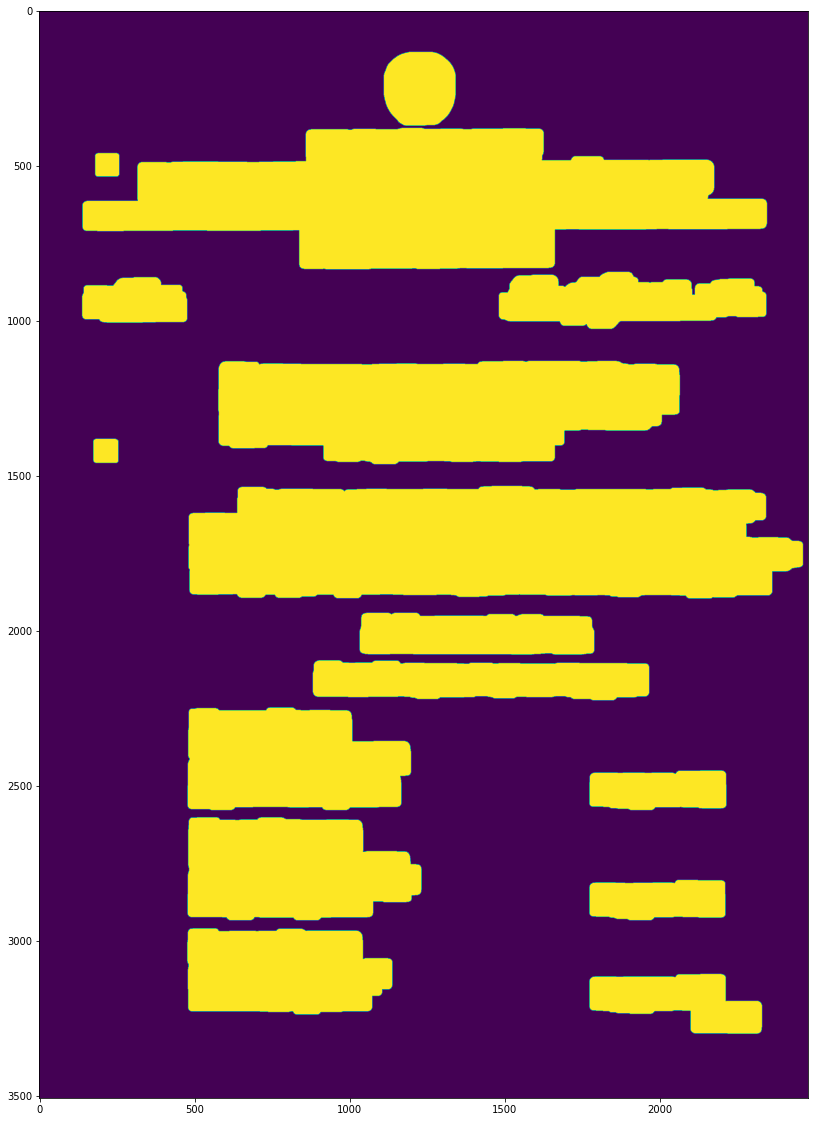

In [5]:
binary = cv2.adaptiveThreshold(threshold_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, -5)
# Show pictures 
show_image(binary)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
dilation = cv2.dilate(binary,kernel,iterations = 6)
show_image(dilation)

[[1775, 3107, 557, 193], [478, 2960, 662, 278], [1775, 2804, 439, 130], [479, 2602, 755, 332], [1775, 2451, 442, 128], [479, 2248, 721, 331], [883, 2096, 1085, 129], [1034, 1943, 757, 135], [482, 1534, 1982, 363], [578, 1131, 1489, 333], [139, 861, 339, 147], [1483, 844, 863, 184], [140, 380, 2208, 456], [1112, 135, 232, 238]]
14


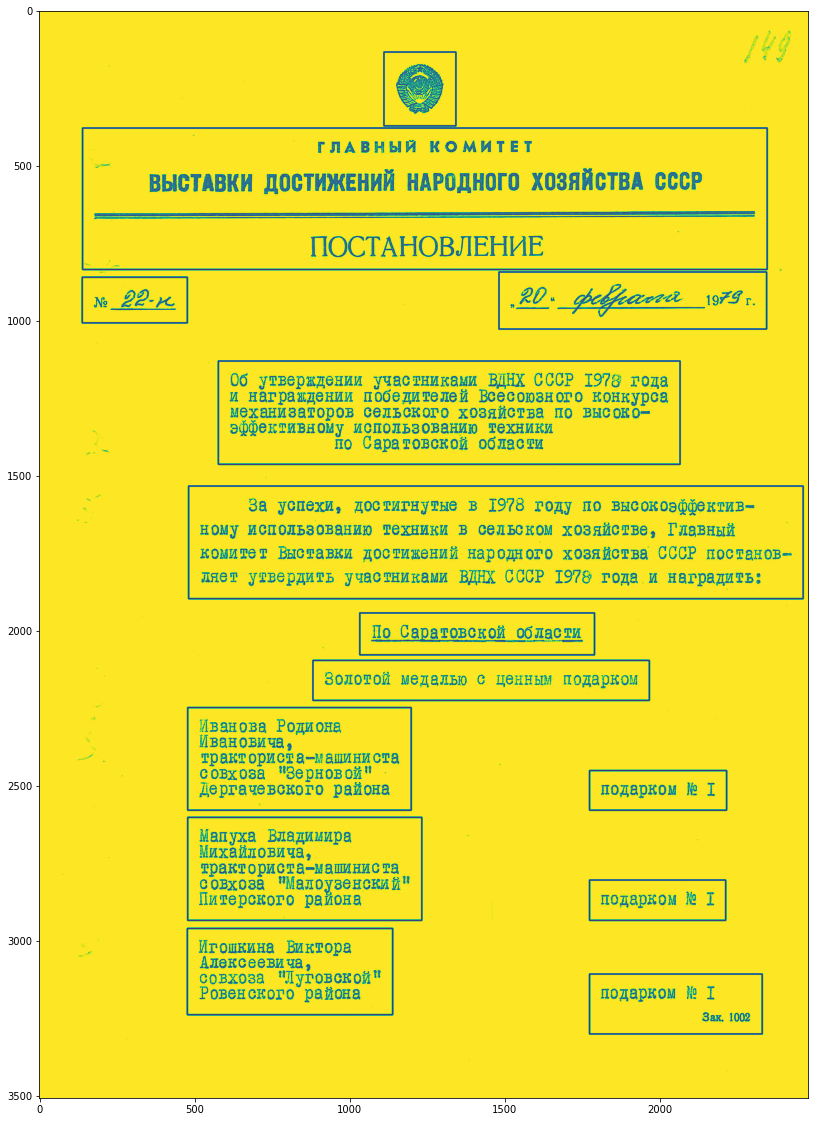

In [6]:
# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
ddd = gray.copy()
ROI_number = 0
list_contur_num = []
list_contur_coord = []
k = -1
for c in cnts:
    area = cv2.contourArea(c)
    k += 1 
    if area > 10000:
        list_contur_num.append(k)
        x,y,w,h = cv2.boundingRect(c)
        list_contur_coord.append([x,y,w,h])
        cv2.rectangle(ddd, (x, y), (x + w, y + h), (36,255,12), 3)
        # ROI = image[y:y+h, x:x+w]
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        # ROI_number += 1
print(list_contur_coord)
print(len(list_contur_coord))
show_image(ddd)

In [7]:
def def_text(out):
    d = pytesseract.image_to_data(out, output_type=pytesseract.Output.DICT, lang="rus")
    n_boxes = len(d['level'])
    print(n_boxes)
    img_rez = out.copy()
    #file_mistakes = open('file_mistakes2.txt','a')
    for i in range(n_boxes):
        (t, x, y, w, h) = (d['text'][i],d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
        img_rez = cv2.rectangle(img_rez, (x, y), (x + w, y + h), (0, 255, 0), 1)
        t = t.strip().replace('|','').replace('.','').replace('--','').replace('—-','').replace('”','')
        if len(t)>0 and len(t)< 15:# and not t.isdigit():
            print(t, x, y, w, h, sep=' | ')
            #file_mistakes.write(t+'\n'))

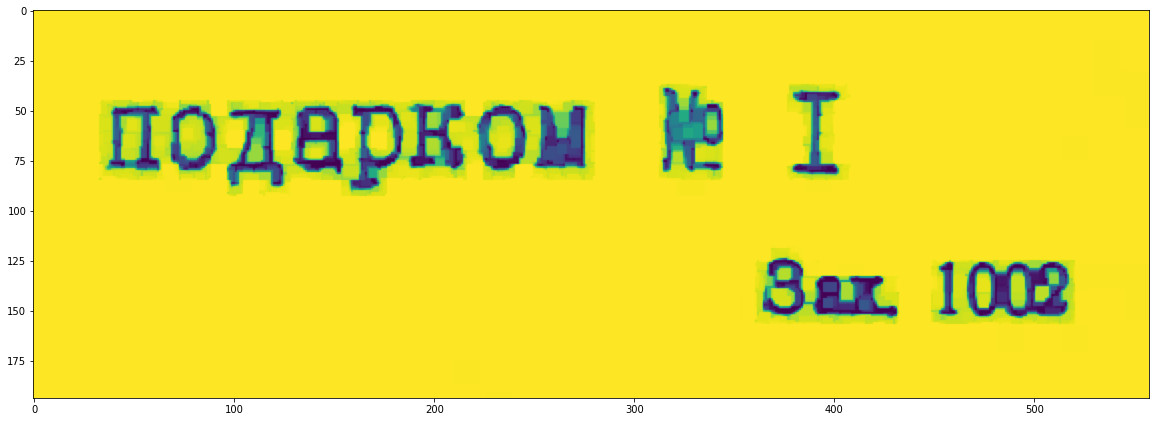

10
подарком | 38 | 47 | 238 | 43
№ | 315 | 39 | 30 | 41
1 | 380 | 40 | 23 | 42
Захж | 365 | 124 | 67 | 29
1008 | 453 | 126 | 65 | 28


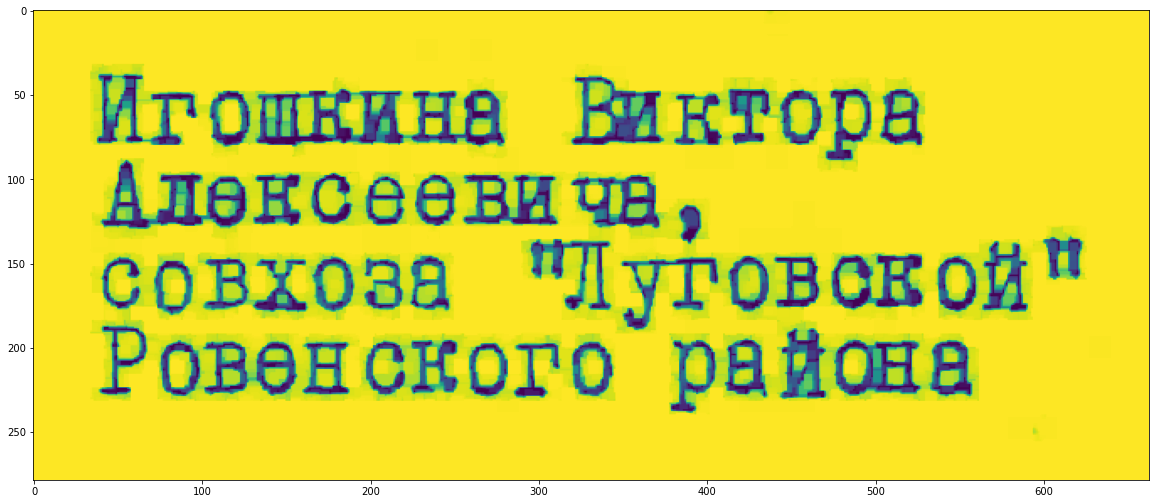

14
Игошкина | 38 | 38 | 242 | 43
Виктора | 320 | 40 | 208 | 49
Алексеевича, | 41 | 89 | 356 | 49
совхоза | 41 | 146 | 206 | 35
"Луговской" | 296 | 135 | 327 | 55
Ровенского | 40 | 188 | 304 | 42
района | 379 | 189 | 179 | 50


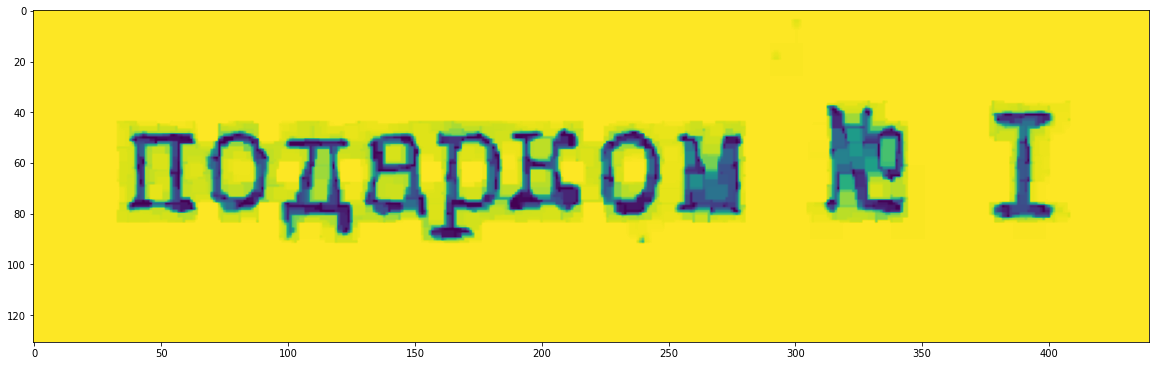

7
подарком | 38 | 47 | 241 | 44
® | 313 | 38 | 30 | 42
1 | 379 | 40 | 23 | 42


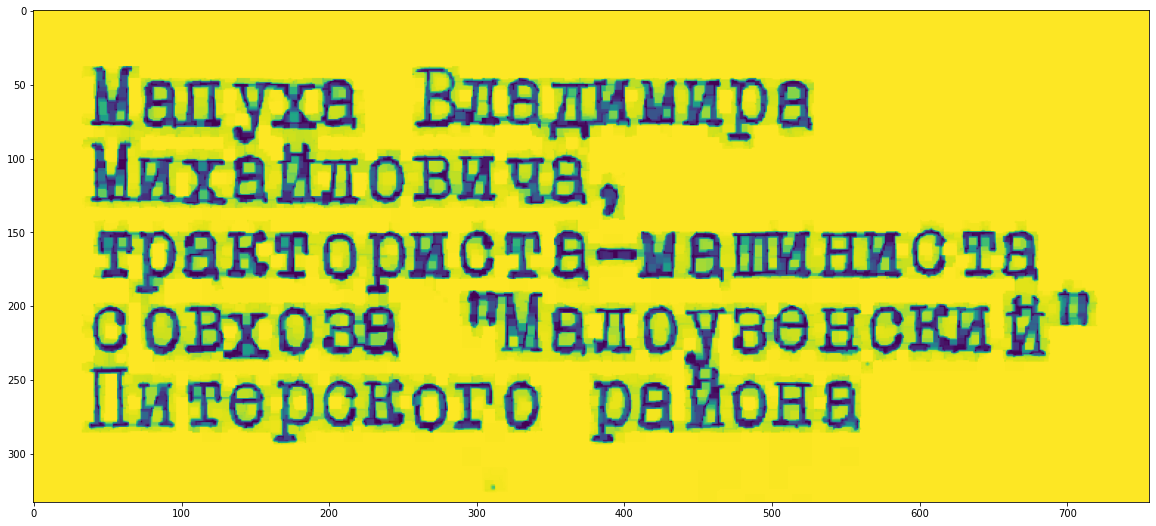

18
Мапуха | 39 | 38 | 180 | 53
Владимира | 259 | 39 | 269 | 50
МихайлоВича, | 39 | 89 | 358 | 50
та | 610 | 136 | 75 | 60
совхоза | 41 | 200 | 206 | 36
"Малоузенски | 294 | 190 | 353 | 44
й" | 646 | 183 | 69 | 61
Питерского | 38 | 242 | 305 | 51
района | 379 | 251 | 181 | 42


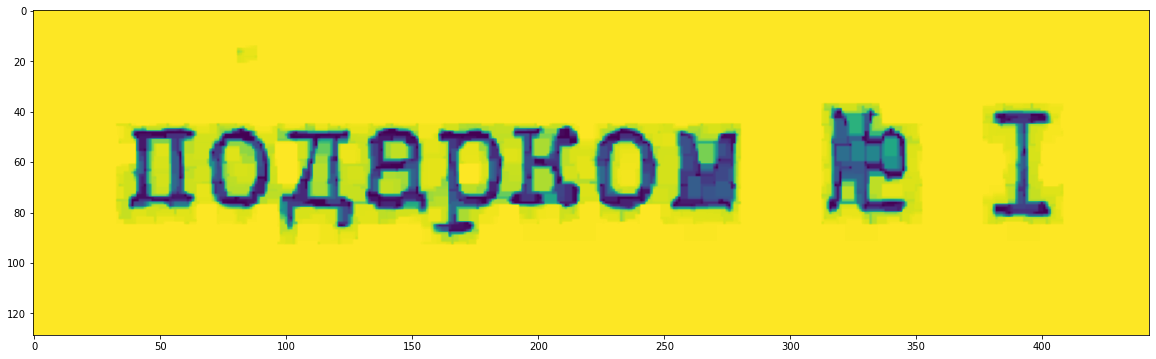

7
подарком | 38 | 46 | 241 | 44
№ | 316 | 39 | 31 | 41
Т | 381 | 40 | 23 | 42


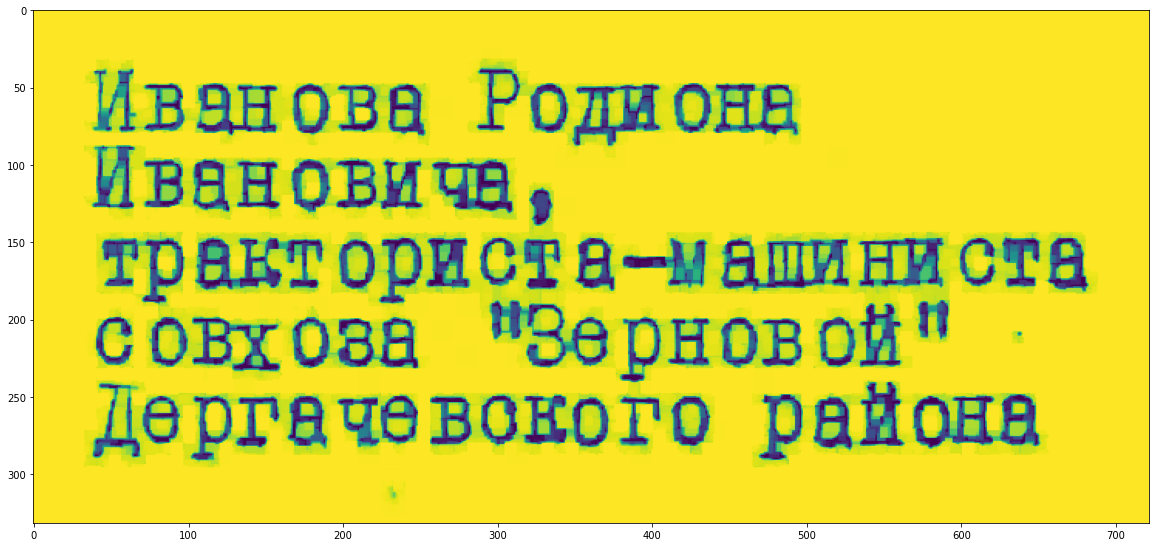

18
Иванова | 40 | 39 | 213 | 42
Родиона | 288 | 38 | 207 | 50
Ивановича, | 39 | 88 | 297 | 52
ста | 584 | 135 | 103 | 61
совхоза | 41 | 199 | 208 | 35
"Зерновой | 296 | 188 | 296 | 53
" | 558 | 184 | 22 | 62
Дергачевсокого | 39 | 242 | 399 | 49
райовна | 470 | 241 | 181 | 50


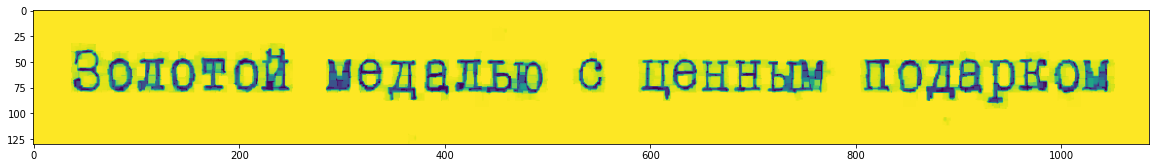

9
Золотой | 39 | 37 | 210 | 43
медалью | 285 | 48 | 211 | 39
с | 531 | 47 | 23 | 31
ценным | 592 | 48 | 178 | 39
подаркомы | 809 | 47 | 238 | 43


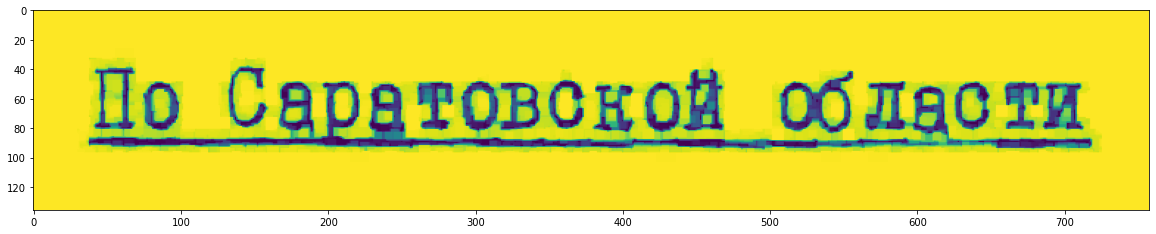

7
По | 42 | 40 | 57 | 42
Саратовской | 133 | 39 | 336 | 54
обдасти | 508 | 42 | 205 | 43


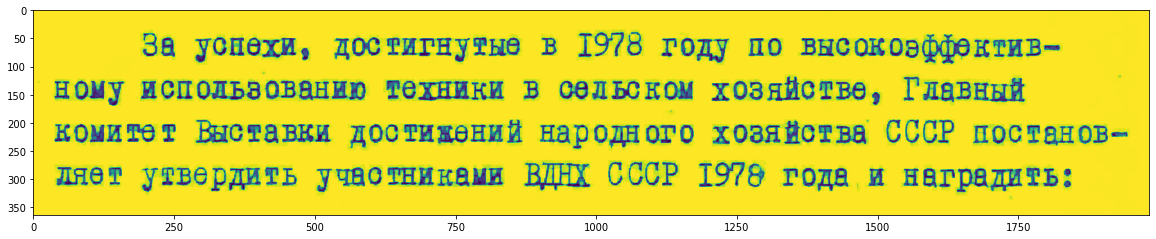

38
За | 195 | 41 | 57 | 42
успехи, | 289 | 49 | 201 | 44
достигнутые | 536 | 49 | 329 | 43
в | 904 | 49 | 26 | 31
1978 | 970 | 39 | 111 | 44
году | 1117 | 50 | 119 | 43
по | 1272 | 50 | 58 | 32
ному | 39 | 126 | 123 | 43
использованию | 192 | 125 | 399 | 35
техники | 629 | 125 | 208 | 36
в | 872 | 126 | 26 | 32
сельском | 936 | 126 | 236 | 34
хозяйстве, | 1206 | 118 | 299 | 51
Главный | 1548 | 119 | 214 | 44
комитет | 38 | 202 | 216 | 33
Выставки | 289 | 195 | 240 | 41
достижений | 564 | 195 | 305 | 50
народного | 901 | 204 | 273 | 42
хозяйства | 1208 | 197 | 272 | 41
СССР | 1517 | 195 | 120 | 41
постанов- | 1671 | 205 | 274 | 35
днет | 42 | 279 | 116 | 32
утвердить | 194 | 280 | 274 | 43
участниками | 505 | 279 | 331 | 44
ВДНХ | 874 | 271 | 116 | 49
СССР | 1022 | 269 | 123 | 43
1978 | 1184 | 270 | 116 | 44
года | 1333 | 280 | 116 | 42
и | 1485 | 281 | 27 | 31
нвградить: | 1547 | 280 | 297 | 43


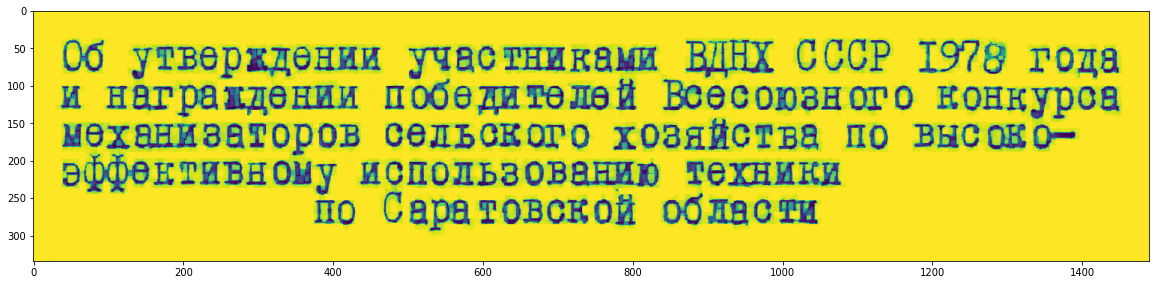

32
06 | 41 | 40 | 53 | 42
утверкдении | 132 | 49 | 332 | 43
участниками | 502 | 48 | 331 | 44
ВДНХ | 871 | 39 | 119 | 51
СССОР | 1020 | 39 | 124 | 43
1978 | 1183 | 40 | 115 | 45
года | 1331 | 49 | 119 | 41
и | 38 | 101 | 26 | 30
награждении | 99 | 100 | 335 | 42
победителей | 470 | 91 | 336 | 49
Всесоюзного | 842 | 92 | 332 | 42
конкурса | 1207 | 100 | 243 | 45
механизаторов | 39 | 151 | 397 | 42
сельского | 471 | 150 | 272 | 35
хозяйства | 775 | 144 | 274 | 42
по | 1086 | 153 | 55 | 33
высоко- | 1177 | 151 | 215 | 35
эффективному | 40 | 192 | 366 | 54
использованию | 437 | 201 | 398 | 40
техники | 873 | 201 | 206 | 34
по | 376 | 253 | 54 | 33
Саратовской | 469 | 242 | 335 | 52
области | 842 | 244 | 206 | 42


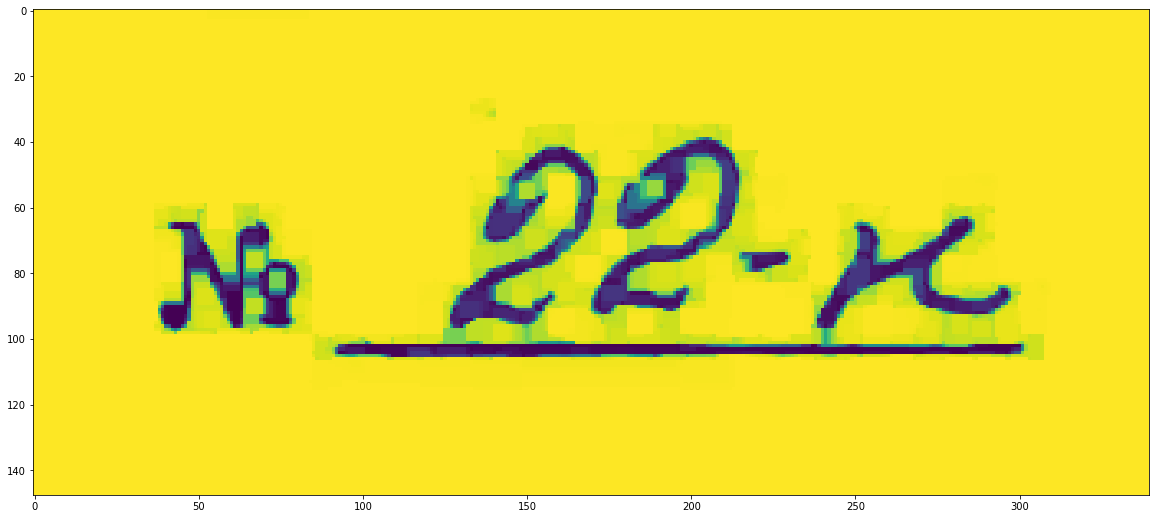

1


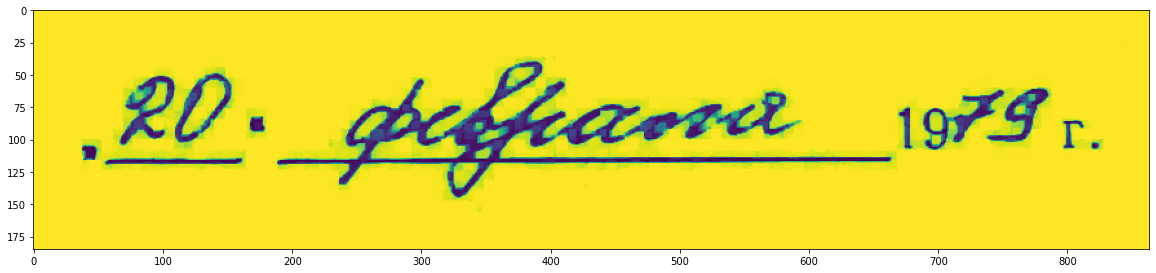

9
‚ | 38 | 105 | 11 | 11
2О | 68 | 45 | 98 | 83
'_@й‹гм'@ | 242 | 40 | 347 | 105
197 | 670 | 46 | 65 | 82


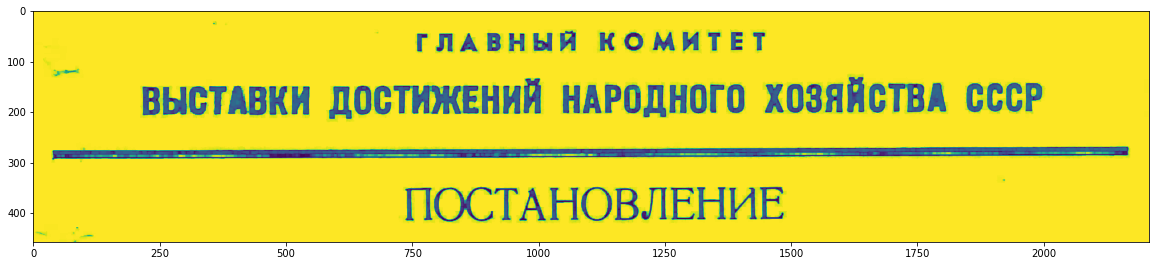

22
ГЛАВНЫЙ | 761 | 39 | 313 | 41
КОМИТЕТ | 1122 | 41 | 327 | 38
ВЫСТАВКИ | 217 | 148 | 330 | 58
ДОСТИЖЕНИЙ | 587 | 134 | 418 | 79
НАРОДНОГО | 1049 | 145 | 359 | 65
ХОЗЯЙСТВА | 1449 | 131 | 358 | 70
СССР | 1848 | 142 | 149 | 58
ПОСТАНОВЛЕНИЕ | 737 | 348 | 748 | 68


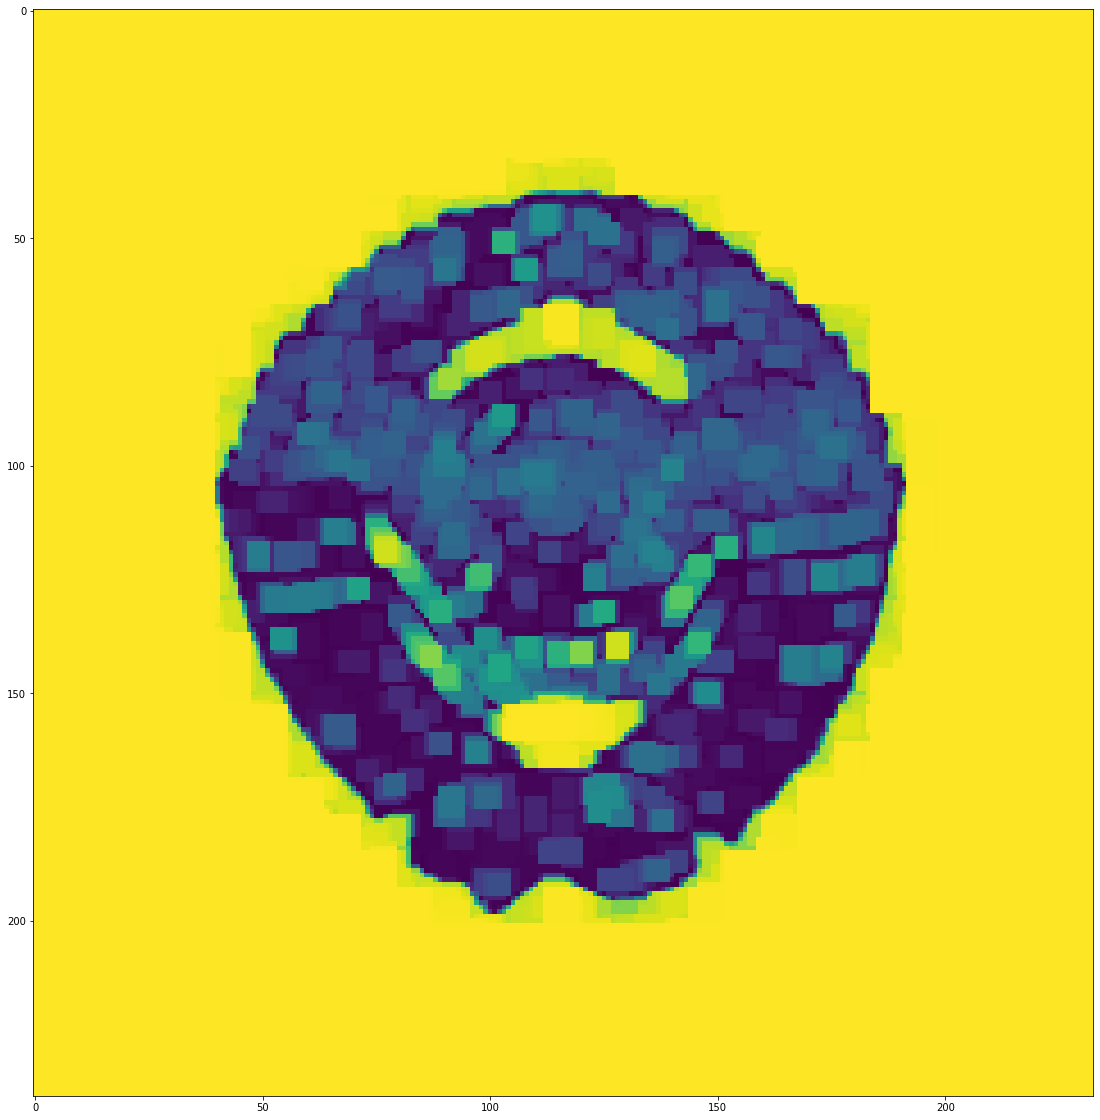

1


In [8]:
ish_img = cv2.imread(name_jpg, 1)
for coord in list_contur_coord:
    out = ish_img[coord[1]:coord[1]+coord[3]+1, coord[0]:coord[0]+coord[2]+1,]
    out = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5,5),np.uint8)
    out = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)
    show_image(out)
    def_text(out)